In [12]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from pathlib import Path
import os
from MitoCode_Functions import GetData
from MitoCode_Functions import findLength, findLength2, findAvgWidth, findNumberofNodes, findVolume2, findDistofNodes, findPixelIntensity
# imports   

In [13]:
import tifffile

# Load LSM file into memory
directory = input("Give directory of where LSM files are stored, (eg /home/user/Desktop/...): ") + "/"
# directory = '/home/biratal/Desktop/'
nameOfLsm = input("Give the name of the lsm without extension (eg ANTPOST052): ")
# nameOfLsm = 'ANTPOST052'
lsm_file = tifffile.TiffFile(directory + nameOfLsm + '.lsm')

# Get the images from the LSM file
images = lsm_file.asarray()

In [15]:
tif1 = images[:, 0, :, :]
tif2 = images[:, 1, :, :]
tif3 = images[:, 2, :, :]

storDir = directory + 'AnalysisFiles_' + nameOfLsm

if os.path.exists(directory + 'AnalysisFiles_' + nameOfLsm) == False: 
    os.mkdir(directory + 'AnalysisFiles_' + nameOfLsm)

tif_dir = storDir
try: 
    os.mkdir(tif_dir + "/tif1")
    os.mkdir(tif_dir + "/tif2")
    os.mkdir(tif_dir + "/tif3")
except: 
    FileExistsError


tifffile.imwrite(tif_dir + "/tif1/" + nameOfLsm + "_tif1.tif", tif1, bigtiff=True)
tifffile.imwrite(tif_dir + "/tif2/" + nameOfLsm + "_tif2.tif", tif2, bigtiff=True)
tifffile.imwrite(tif_dir + "/tif3/" + nameOfLsm + "_tif3.tif", tif3, bigtiff=True)


In [16]:
mitographDirectory = input("Give directory of where the Mitograph execuatable is, enter n for default ( can be changed in source code): ")

if mitographDirectory == 'n': 
    mitographDirectory = "/home/biratal/Desktop/MitoGraph/build/"

os.chdir(mitographDirectory)
os.system("./MitoGraph -xy 0.104 -z 0.5 -path " + tif_dir + "/tif3 -analyze" )

[Starting MitoGraph v3.0]
1 files found. MitoGraph is running...
/home/biratal/Downloads/AnalysisFiles_ANTPRE051/tif3/ANTPRE051_tif3	[done]
Process complete. Exiting MitoGraph...


0

In [6]:

direct3 = tif_dir + "/tif3" # enter the directory of where the mitograph-generated files are
nodeDist3, nodeLists3, skelePos3, compList3 = GetData(direct3)

import imageio
imagepre1 = imageio.volread(tif_dir + "/tif1/" + nameOfLsm + "_tif1.tif")
imagepre2 = imageio.volread(tif_dir + "/tif2/" + nameOfLsm + "_tif2.tif")



In [7]:
class node: 
    def __init__(self, dat, pointer, dist, conn): 
        self.start = dat 
        self.next = pointer
        self.dist = dist
        self.conn = conn
# class for a node

In [24]:
# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  

def plotMitoWithNode2(PreOrPost, dir, down = 0, up = 100, highlighted = 1): # takes in a pre or post image
    x = []
    y = []
    z = []

    x1 = []
    y1 = []
    z1 = []

    nX = []
    nY = []
    nZ = []


    nX1 = []
    nY1 = []
    nZ1 = []

    nodeDf = PreOrPost.loc[PreOrPost.nodeState == True]

    # fig = plt.figure(figsize=(4,4))
    # ax = fig.add_subplot(111, projection='3d')
    fig = plt.figure()
    ax = Axes3D(fig)
  

    for k in range(down, up):
        a = PreOrPost.loc[PreOrPost["cc"] == k]
       
        if k == highlighted: 
            x1.append(a["x"].values)
            y1.append(a["y"].values)
            z1.append(a["z"].values)

            na = nodeDf.loc[nodeDf["cc"] == k]
            nX1.append(na["x"].values)
            nY1.append(na["y"].values)
            nZ1.append(na["z"].values)


        else: 
            x.append(a["x"].values)
            y.append(a["y"].values)
            z.append(a["z"].values)

            na = nodeDf.loc[nodeDf["cc"] == k]
            nX.append(na["x"].values)
            nY.append(na["y"].values)
            nZ.append(na["z"].values)

    for i in range(len(x)): 

            ax.scatter(x[i], y[i] ,z[i], marker=".", color = "blue" )
            # ax.scatter(nX[i], nY[i], nZ[i], color = 'red')
    
    for i in range(len(x1)):
            ax.scatter(x1[i], y1[i] ,z1[i], marker=".", color = "green" )
            # ax.scatter(nX1[i], nY1[i], nZ1[i], color = 'orange')
    fig.savefig(storDir + "/3D_mitochondria.png")
    
    return 1

In [9]:
def getVolumeAndGroup(nodeTree, compList): # adds volume and group 
    nodeTree["Volume"] = None
    nodeTree["Group"] = None
    ntv = nodeTree.values
    clv = compList.values
    for i in ntv: 
        for j in clv:
            if i[0] == j[0] or i[1] == j[0]: 
                i[3] = j[2]
                i[4] = j[1]
    nodeTree = pd.DataFrame(ntv, columns=["X", "Y", "dist", "Volume", "Group"])
    return nodeTree
# function to clean the nodeDist, as it is has different columns
def cleanNodeDist(nodeDist, compList):  
    a = nodeDist[nodeDist.columns[0]]
    lis = np.array(list(a.items()), dtype = object)
    A = []

    for i in lis: 
        A.append([i[0], i[1]])
    nlis = np.array(lis, dtype = object)
    X = []
    Y = []
    dist = []

    for i in range(len(nlis)): 
        x, y = nlis[i][0]
        X.append(x)
        Y.append(y)
        dist.append(nlis[i][1])

    X = np.array(X)
    Y = np.array(Y)
    dist = np.array(dist)
    nTree = pd.DataFrame({"X": X, "Y":Y, "dist":dist})
    return getVolumeAndGroup(nTree, compList)
# cleaning data for node coordinates
def cleanCoordinate(nodeLists):
    A = []
    for i in nodeLists.columns: 
        A.append(float(i))
    Blist = []
    Blist.append(A)
    # 
    for i in nodeLists.values: 
        Blist.append(list(i))
    return pd.DataFrame(np.array(Blist), columns= ["x", "y", "z"])
# adding nodes
def addNodes(skelePos, nodeCoordinates):
    roundSkele = skelePos.round(4)
    a = nodeCoordinates[['x', 'y', 'z']].values.tolist()
    b = roundSkele[['x', 'y', 'z']].values.tolist()

    roundSkele["nodeState"] = False
    roundSkele["node"] = None
    notFoundList = [] # list for coordinates that weren't found because of rounding

    for i in range(len(b)): 
        for j in range(len(a)): 
            if b[i] == a[j]: 
                roundSkele.at[i, "nodeState"] = True
                roundSkele.at[i, "node"] = j    
    return roundSkele
# get the group given the node
def getCCfromNode(compList3, node): 
    a = compList3.loc[compList3.Node == node]
    return a.Belonging_CC.values[0]
# get the node given the group
def getNodefromCC(compList3, cc): 
    a = compList3.loc[compList3.Belonging_CC == cc]
    return a.Node.values
# Find the groups 
def FindGroup(df, compList): 
    if len(df.node.values) >1:
        liz = list(filter(None, df.node.values))
        if len(liz) >= 1:
            Node = liz[0]
            n = list(compList.values[:, 0])
            cc = compList.values[:, 1]
            return cc[n.index(Node)]
        else: 
            return -1
# generate the dataframe with
def genBigDf(skelePos, compList, nodeLists):
    nodeCoordinates = cleanCoordinate(nodeLists)
    roundSkele = addNodes(skelePos, nodeCoordinates)
    maxline_id = max(roundSkele.line_id.values)

    roundSkele["cc"] = None
    test = []

    for i in range(maxline_id + 1):
        df = roundSkele.loc[roundSkele.line_id == i]
        test.append(df)

    for i in range(len(test)): 
        test[i].cc = FindGroup(test[i], compList)

    return pd.concat(test)
# find the distance between nodes 
def lengthList(bigDf1, temp): # produces a list with the longest (in length) to shortest (in length)
        maxcc = bigDf1.cc.max()
        Ls = []
        for k in range(int(maxcc)):
            test = bigDf1.loc[bigDf1.cc == k]
            linids = []
            lens = []
            endparts = []

            for i in set(test.line_id): 
                secTest = test.loc[test.line_id == i]
                b = secTest.loc[secTest.nodeState == True]
                if len(b) < 2: 
                    endparts.append(secTest)
                else: 
                    linids.append(b)
                
            for i in linids: 
                nodesInid = i.node.values
                lens.append(findDistofNodes(nodesInid[0], nodesInid[1], temp))

            for j in endparts: 
                lens.append(findLength2(j))
            
            Ls.append(np.sum(lens))

            # Ls.append([np.sum(lens), int(k)])
        # sorted_ls = sorted(Ls, key=lambda x: x[0], reverse=True)
        return Ls

def findBranching(df):
    return len(set(df.line_id.values))

def getLineIdFromCC(df, c): 
    a = df.loc[df.cc == c]
    return set(a.line_id.values)
    
def findCCfromLineId(df, linid):
    a = df.loc[df.line_id == linid]
    return a.cc.values[0] 

# getting it for the entire thing

def getFinalDat_entire(bigDf, temp): 
    maxcc = max(bigDf.cc)
    dat = []
    datfunc = []
    for i in range(int(maxcc + 1)):
        d = bigDf[bigDf.cc == i]
        dat.append([i, findLength(d, temp), findVolume2(d), findBranching(d), findNumberofNodes(d), findPixelIntensity(d)])
        # datfunc.append([findPixelIntensity(d)])
    sorted_ls = sorted(dat, key=lambda x: x[2], reverse=True)
    return pd.DataFrame(dat, columns=['cc', 'Length', 'Volume', 'Number of Branches', 'Number of Nodes', 'pixint'])

def getFinalDat_element(bigDf, temp): 
    maxcc = max(bigDf.line_id)
    dat = []
    datfunc = []
    for i in range(int(maxcc + 1)):
        d = bigDf[bigDf.line_id == i]
        dat.append([i, findLength(d, temp), findVolume2(d), findAvgWidth(d), findCCfromLineId(d, i), findPixelIntensity(d)])
        # datfunc.append([findPixelIntensity(d)])
    sorted_ls = sorted(dat, key=lambda x: x[2], reverse=True)
    return pd.DataFrame(dat, columns=['lineid', 'Length', 'Volume', 'Width', 'cc', 'pixint'])

def getPixelFromGeometrical(x_geometric, y_geometric, z_geometric): 
    pixel_size_x = 0.104
    pixel_size_y = 0.104
    pixel_size_z = 0.5

    x_pixel = int((x_geometric - 0) / pixel_size_x)
    y_pixel = int((y_geometric - 0) / pixel_size_y)
    z_pixel = int((z_geometric - 0) / pixel_size_z)
    return x_pixel, y_pixel, z_pixel

def getPixelIntensityFromPixel(arr, x, y, z):     
    return arr[z][x, y]
    
def addFunctional(df, image, image2):
    for i in range(len(df)): 
        x1, y2, z3 = df.loc[i, ['x', 'y', 'z']].values
        x, y, z = getPixelFromGeometrical(x1, y2, z3)
        
        a = getPixelIntensityFromPixel(image, y, x, z)
        b = getPixelIntensityFromPixel(image2, y, x, z)

        df.loc[i, 'pixint1'] = getPixelIntensityFromPixel(image, y, x, z)
        df.loc[i, 'pixint2'] = getPixelIntensityFromPixel(image2, y, x, z)
           
        if a and b != 0: 
            df.loc[i, 'pix_ratio'] = np.round(b/a, 3)
        else: 
            df.loc[i, 'pix_ratio'] = None 
            
        df.loc[i, 'pposx'] = x
        df.loc[i, 'pposy'] = y
        df.loc[i, 'pposz'] = z
 
    return df


In [10]:
bigDfpre = genBigDf(skelePos3, compList3, nodeLists3)
bigDfpre = addFunctional(bigDfpre, imagepre1, imagepre2)
temp = cleanNodeDist(nodeDist3, compList3)
preElement = getFinalDat_element(bigDfpre, temp)
preEntire = getFinalDat_entire(bigDfpre, temp)


/tmp/ipykernel_8311/780199734.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i].cc = FindGroup(test[i], compList)


/tmp/ipykernel_8311/3177588960.py:34: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


1

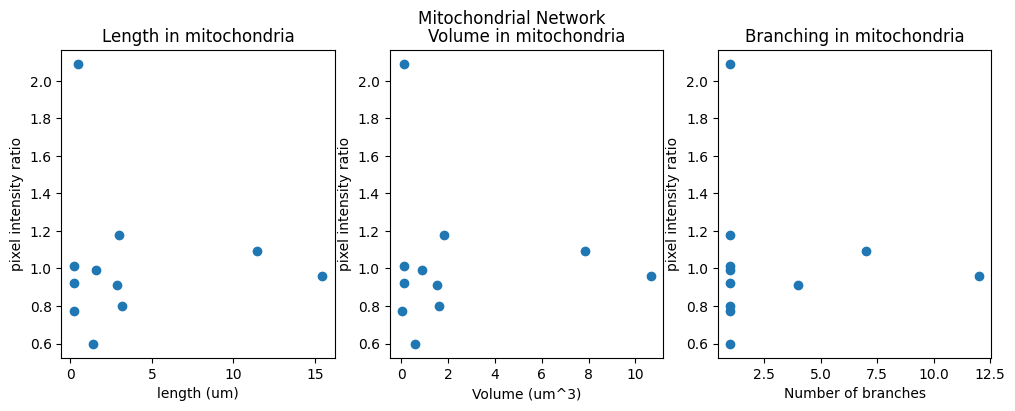

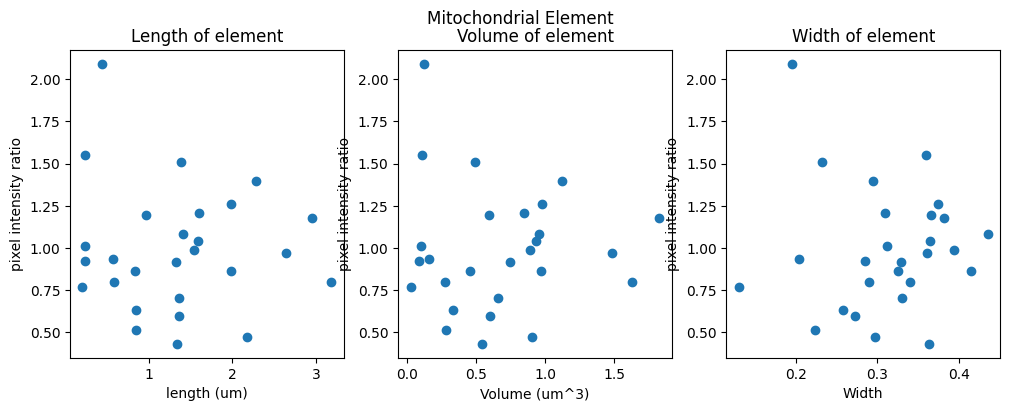

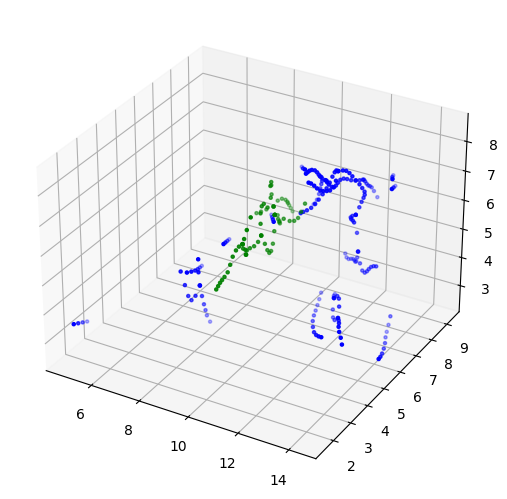

In [25]:

def plotGraphsEntire(df, dir, title = "Mitochondrial Network", ):
    dat = df.values
    datfunc = df['pixint'].values
    fig, ax = plt.subplots(1,3, figsize=(12,4))
    plt.suptitle(title)
    # plot each image on its own axis
    ax[0].scatter(dat[:, 1], datfunc)
    ax[0].set_xlabel("length (um)")
    ax[0].set_ylabel("pixel intensity ratio")
    ax[0].set_title("Length in mitochondria")


    ax[1].scatter(dat[:, 2], datfunc)
    ax[1].set_xlabel("Volume (um^3)")
    ax[1].set_ylabel("pixel intensity ratio")
    ax[1].set_title("Volume in mitochondria")


    ax[2].scatter(dat[:, 3], datfunc)
    ax[2].set_xlabel("Number of branches")
    ax[2].set_ylabel("pixel intensity ratio")
    ax[2].set_title("Branching in mitochondria")


    # ax[3].scatter(dat[:, 4], datfunc)
    # ax[3].set_xlabel("Number of Nodes")
    # ax[3].set_ylabel("pixel intensity ratio")
    # ax[3].set_title("Nodes in Mitchondria")


    # ax[0].set_xlim(0, 50)
    # ax[1].set_xlim(0, 50)
    # ax[2].set_xlim()
    # ax[3].set_xlim(0, 100)


    # # turn off axis labels
    # ax[0].axis('off')
    # ax[1].axis('off')
    # ax[2].axis('off')
    plt.savefig(dir + "/Mitochindrial_Network.png")

def plotGraphsElement(df, dir, title = "Mitochondrial Element"):
    dat = df.values
    datfunc = df['pixint'].values
    fig, ax = plt.subplots(1,3, figsize=(12,4))
    plt.suptitle(title)
    # plot each image on its own axis
    ax[0].scatter(dat[:, 1], datfunc)
    ax[0].set_xlabel("length (um)")
    ax[0].set_ylabel("pixel intensity ratio")
    ax[0].set_title("Length of element")


    ax[1].scatter(dat[:, 2], datfunc)
    ax[1].set_xlabel("Volume (um^3)")
    ax[1].set_ylabel("pixel intensity ratio")
    ax[1].set_title("Volume of element")


    ax[2].scatter(dat[:, 3], datfunc)
    ax[2].set_xlabel("Width")
    ax[2].set_ylabel("pixel intensity ratio")
    ax[2].set_title("Width of element")


    # ax[0].set_xlim(0, 50)
    # ax[1].set_xlim(0, 50)
    # ax[2].set_xlim()
    # ax[3].set_xlim(0, 100)


    # # turn off axis labels
    # ax[0].axis('off')
    # ax[1].axis('off')
    # ax[2].axis('off')
    plt.savefig(dir + "/Mitochindrial_Element.png")

maxCC = preEntire.loc[preEntire.Length == preEntire.Length.max()].cc.values[0]

plotGraphsEntire(preEntire, storDir )
plotGraphsElement(preElement, storDir )
plotMitoWithNode2(bigDfpre, storDir, highlighted=maxCC)



5